# <font color='blue'>Estatística Descritiva Univariada quantitativa - parte 3</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1


### Medidas de forma
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
Existem duas medidas de forma, que são **assimetria** e **curtose**. <br>
As medidas de assimetria e curtose caracterizam a forma da distribuição dos elementos da população amostrados em torno da média. <br>
Em inglês, assimetria é conhecida como skewness e curtose é conhecida como kurtosis. <br>
</details>

In [1]:
# Importando pacotes
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

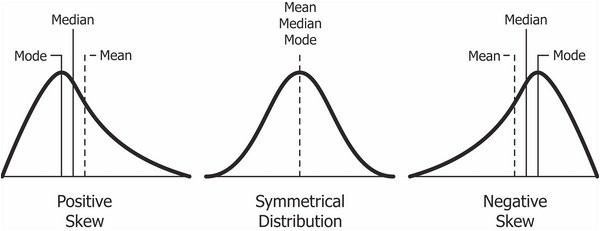

In [2]:
# Carregando imagem com os exemplos de assimetria
Image('Imagens/skewness.jpeg')

### Métodos utilizados para calcular a assimetria dos dados
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

**Primeiro coeficiente de assimetria de Pearson**: esse coeficiente é uma medida de assimetria encontrada pela diferença entre a média e a moda, dividida pelo desvio padrão. <br>
**Segundo coeficiente de assimetria de Pearson**: o segundo coeficiente de assimetria de Pearson utiliza uma relação empírica entre a média, a mediana e a moda para encontrar a assimetria. <br>
**Coeficiente de assimetria de Fisher**: calculado a partir do terceiro momento em torno da média. <br> <br>
Para os três coeficientes, nós temos a seguinte interpretação: <br>
Quando o coeficiente é **igual a zero**, dizemos que a distribuição dos dados é simétrica; <br>
Quando o coeficiente é **menor que zero**, dizemos que a distribuição dos dados é assimétrica negativa; <br>
E quando o coeficiente é **maior que zero**, dizemos que a distribuição dos dados é assimétrica positiva. <br><br>
Os coeficientes de assimetria permitem a comparação entre duas ou mais distribuições e a avaliação de qual delas é mais assimétrica. Para realizar essa comparação, devemos considerar o módulo do coeficiente de assimetria, o qual indica a intensidade da assimetria, isto é, quanto maior o coeficiente de assimetria mais assimétrica é a curva. Logo: <br>
Se $0 < $|As|$ < 0,15$, a assimetria é fraca; <br>
Se $0,15 \le $|As|$ \le 1$, a assimetria é moderada; <br>
Se $|As|$ > 1, a assimetria é forte. <br>
    
</details>


In [3]:
# Link para download
# https://gist.github.com/seankross/a412dfbd88b3db70b74b#file-mtcars-csv
df = pd.read_csv('Dados/Auto-mpg/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# Verificando a assimetria
df.hp.skew()

0.7994066925956381

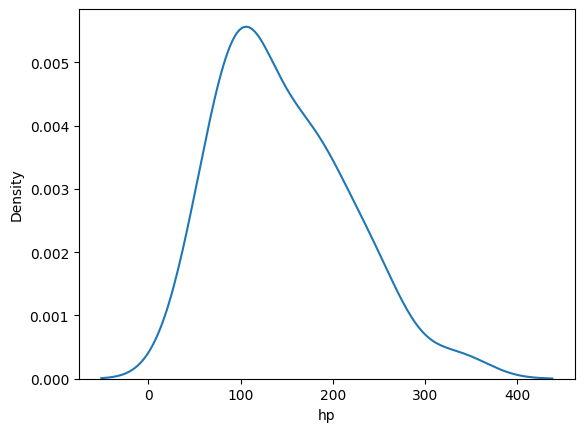

In [5]:
# Criando um KDE plot
ax = sns.kdeplot(data=df, x="hp")
plt.show()

In [6]:
# Definindo o nome da variável que será analisada
variavelAnalisada = "hp"

In [7]:
# Calculando a quantidade de classes da variável que será analisada
n = df[variavelAnalisada].count()
k = round(1+3.3*math.log10(n))
k

6

In [8]:
# Calculando a amplitudade da amostra 
a = max(df[variavelAnalisada])-min(df[variavelAnalisada])

# Calculando o intervalo entre as classes
h = round(a/k)
h

47

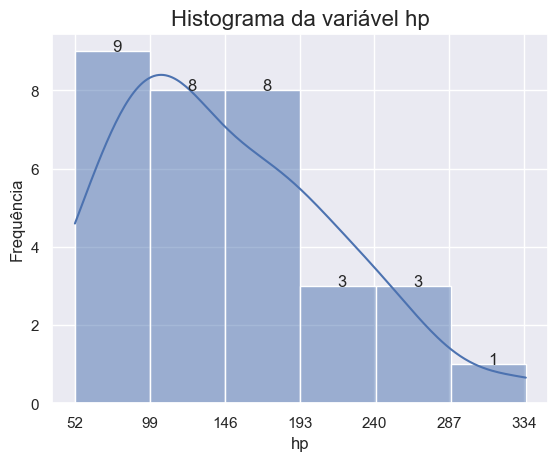

In [9]:
# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

# Criando o histograma
ax = sns.histplot(df[variavelAnalisada], bins=k, kde=True)
ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
ax.set_xlabel(variavelAnalisada, fontsize = 12)
ax.set_ylabel("Frequência", fontsize = 12)
ax.set_xticks(np.arange(min(df[variavelAnalisada]), max(df[variavelAnalisada])+1, h))
for p in ax.patches:
    _x = p.get_x() + (p.get_width()) / 2 - 0.1
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

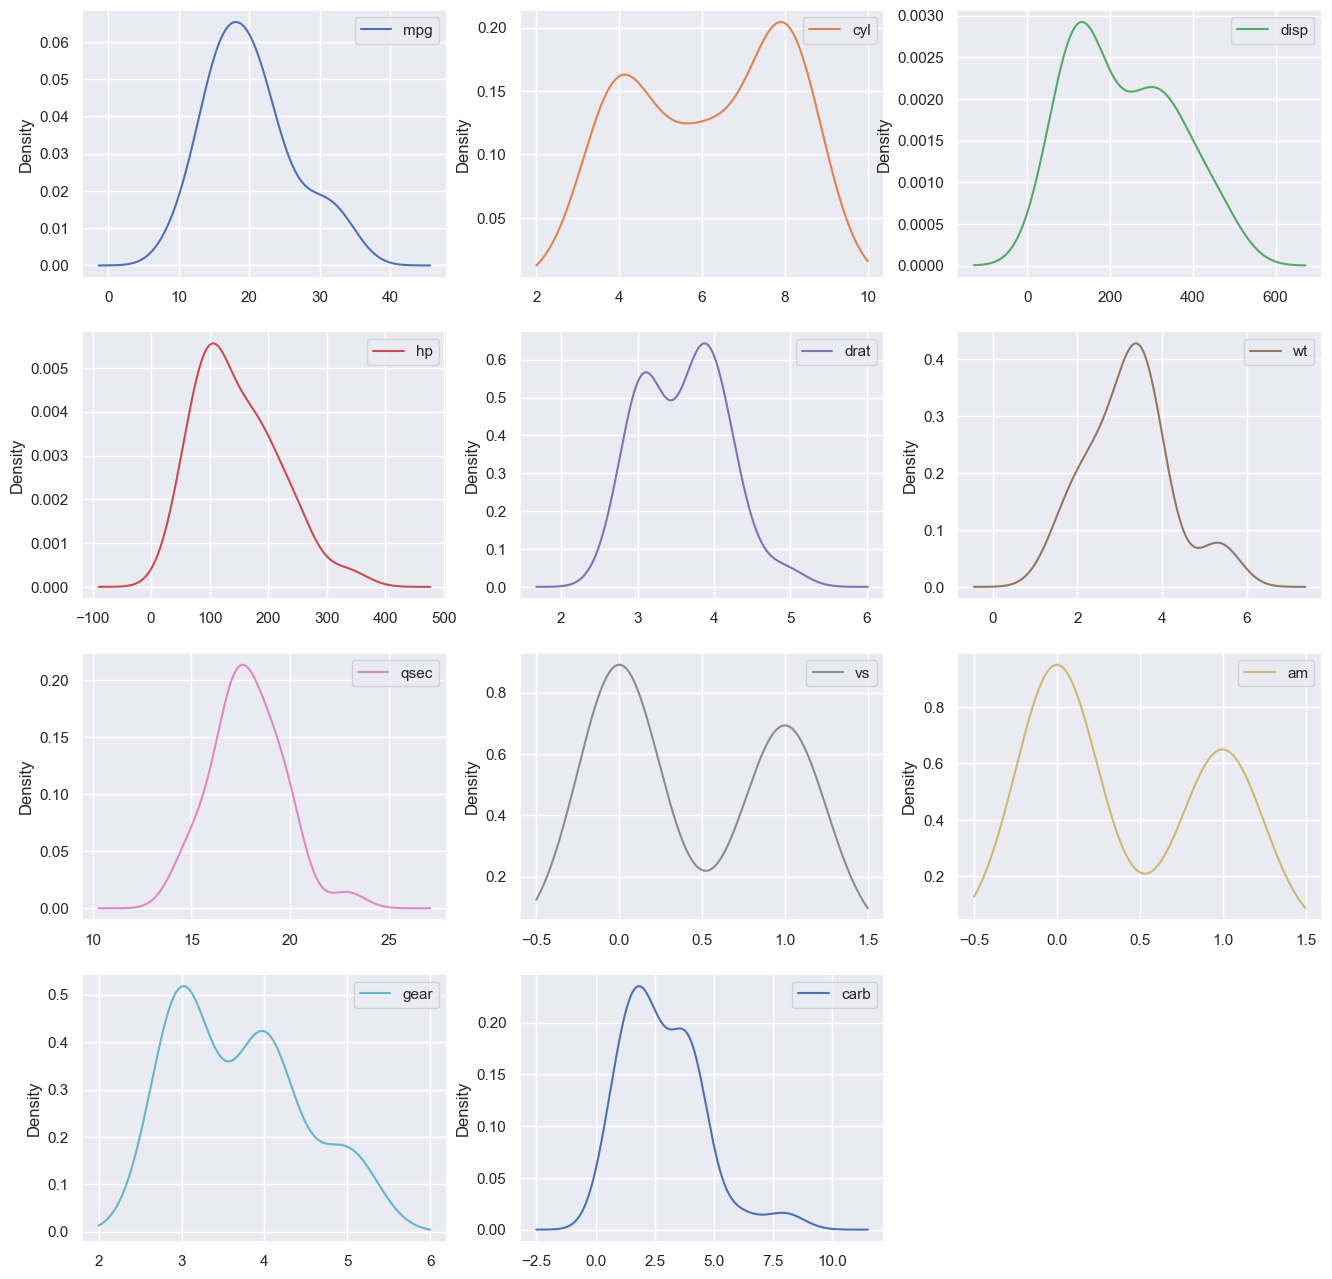

In [10]:
# Exibindo o kdeplot de todas as variáveis
df.plot(kind = "density", subplots = True,  layout = (4,3), sharex = False, figsize=(16, 16))
plt.show()

### Curtose
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Além das medidas de assimetria, as medidas de **curtose** também podem ser utilizadas para caracterizar a forma da distribuição da variável em estudo. <br>
A curtose pode ser definida como o grau de achatamento de uma distribuição de frequências, ou seja, com a curtose, nós analisamos a altura do pico da curva em relação a uma distribuição teórica que geralmente corresponde à distribuição normal. <br>
Quando a forma da distribuição não for muito achatada e nem muito alongada, com aparência semelhante à da curva normal, é denominada **mesocúrtica**. <br>
Por outro lado, quando a distribuição apresentar uma curva de frequências mais achatada que a curva normal, é denominada **platicúrtica**. <br>
Ou ainda, quando a distribuição apresentar uma curva de frequências mais alongada que a curva normal, é denominada **leptocúrtica**. <br>
O coeficiente de curtose de Fisher é um cálculo bastante utilizado para medir o grau de achatamento ou curtose de uma distribuição de dados e possui a seguinte interpretação: <br>
Se curtose $=$ 0, a curva apresenta uma distribuição normal, ou seja, mesocúrtica; <br>
Se curtose $<$ 0, a curva é muito achatada, ou seja, platicúrtica; <br> 
Se curtose $>$ 0, a curva é muito alongada, ou seja, leptocúrtica. 
    
</details>

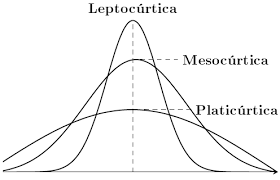

In [11]:
# Imagem sobre curtose
Image('Imagens/curtose.png')

In [12]:
# Verificando a curtose da variável HP
df.hp.kurtosis()

0.2752115875371124

In [13]:
# Verificando a curtose de uma lista de colunas
df[["hp", "cyl", "mpg"]].kurtosis()

hp     0.275212
cyl   -1.762794
mpg   -0.022006
dtype: float64

In [14]:
# Verificando o skew de cada atributo
df[["hp", "cyl", "mpg"]].skew()

hp     0.799407
cyl   -0.192261
mpg    0.672377
dtype: float64